In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

In [4]:
def generate_ref_trajectory(T, dt, traj_type, size, dim=2):
    """
    Generate a 3D reference trajectory for the system to track.
    """
    t = np.linspace(0, T, int(T/dt))
    z_ref = np.zeros((len(t), dim))

    # NOTE: y is vertically up here
    if dim==2:
        if traj_type == 'circle':
            z_ref[:, 0] = size * (np.cos(2 * np.pi / T * t) - 1)
            z_ref[:, 1] = size * np.sin(2 * np.pi / T * t)
        elif traj_type == 'figure_eight':
            z_ref[:, 0] = size * np.sin(2 * np.pi / T * t)
            z_ref[:, 1] = size * np.sin(4 * np.pi / T * t)
        elif traj_type == 'periodic_line':
            m = -1
            z_ref[:, 0] = size * np.sin(2 * np.pi / T * t)
            z_ref[:, 1] = m * size * np.sin(2 * np.pi / T * t)
        elif traj_type == 'arc':
            m = 1
            l_trunk = 0.35
            R = l_trunk / 2
            z_ref[:, 0] = size * np.sin(2 * np.pi / T * t)
            z_ref[:, 1] = m * size * np.sin(2 * np.pi / T * t)
        else:
            raise ValueError('Invalid trajectory type: ' + traj_type + '. Valid options are: "circle" or "figure_eight".')
    elif dim ==3:
        if traj_type == 'circle':
            z_ref[:, 0] = size * (np.cos(2 * np.pi / T * t) - 1)
            z_ref[:, 1] = size / 2 * np.ones_like(t)
            z_ref[:, 2] = size * np.sin(2 * np.pi / T * t)
        elif traj_type == 'figure_eight':
            z_ref[:, 0] = size * np.sin(2 * np.pi / T * t)
            z_ref[:, 1] = 0 * np.ones_like(t)
            z_ref[:, 2] = size * np.sin(4 * np.pi / T * t)
        elif traj_type == 'periodic_line':
            m = -1
            z_ref[:, 0] = size * np.sin(2 * np.pi / T * t)
            z_ref[:, 1] = np.zeros_like(t)
            z_ref[:, 2] = m * size * np.sin(2 * np.pi / T * t)
        elif traj_type == 'arc':
            m = 1
            l_trunk = 0.35
            R = l_trunk / 2
            z_ref[:, 0] = size * np.sin(2 * np.pi / T * t)
            z_ref[:, 2] = m * size * np.sin(2 * np.pi / T * t)
            z_ref[:, 1] = R - np.sqrt(R**2 - z_ref[:, 0]**2 - z_ref[:, 0]**2)
        else:
            raise ValueError('Invalid trajectory type: ' + traj_type + '. Valid options are: "circle" or "figure_eight".')
    return z_ref, t

In [5]:
z_ref, t = generate_ref_trajectory(10, 0.01, 'circle', 0.05, dim=3)

In [6]:
ys_mpc = pd.read_csv(f'../data/trajectories/open_loop/mpc_Rdu005.csv')
rest_position = np.array([0.1018, -0.1075, 0.1062,
                          0.1037, -0.2055, 0.1148,
                          0.1025, -0.3254, 0.1129])
ys_mpc = ys_mpc.to_numpy() - rest_position

In [7]:
len(ys_mpc)

944

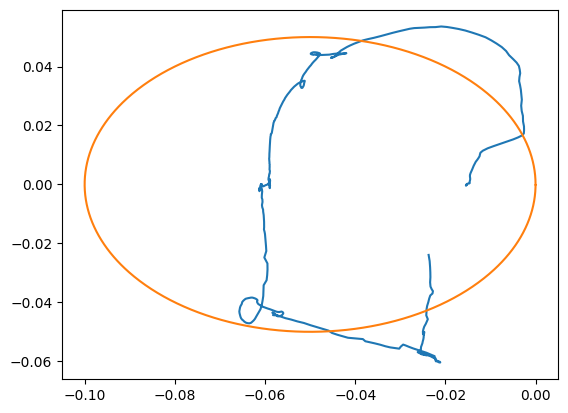

In [15]:
plt.close('all')

fig = plt.figure()
N = -1
plt.plot(ys_mpc[:N, -3], ys_mpc[:N, -1])
plt.plot(z_ref[:N, 0], z_ref[:N, -1])

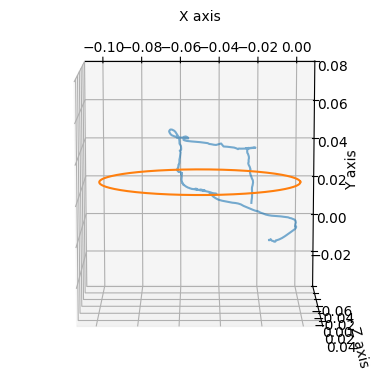

In [12]:
plt.close('all')

# Enable the ipympl backend for interactive plots
# %matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(ys_mpc[:, -3], ys_mpc[:, -2], ys_mpc[:, -1], alpha=0.6)
ax.plot(z_ref[:, 0], z_ref[:, 1], z_ref[:, 2])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
# Adjust the view so that y-axis is upwards
ax.view_init(elev=100, azim=-90)
set_axes_equal(ax)